In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
x=df.drop(columns=['PROFIT'])
y=df[['PROFIT']]

In [8]:
x.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


cat con sep

In [11]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [13]:
cat

['STATE']

In [14]:
con

['RND', 'ADMIN', 'MKT']

preproccessiong pipeline|

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore'))])


In [17]:
pre=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)])

In [18]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['STATE'])])

preprocessing data

In [19]:
x_pre=pre.fit_transform(x)
x_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [20]:
cols=pre.get_feature_names_out()

In [22]:
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [23]:
x_pre=pd.DataFrame(x_pre,columns=cols)
x_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0
5,1.279800,-0.776239,1.254210,0.0,0.0,1.0
6,1.340066,0.932147,-0.688150,1.0,0.0,0.0
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
8,1.030369,0.986952,0.830887,0.0,0.0,1.0
9,1.091819,-0.456640,0.776107,1.0,0.0,0.0


train test split

In [24]:
from  sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.2,random_state=21)

In [25]:
xtrain.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
30,-0.258074,-0.205629,-0.990357,0.0,1.0,0.0
21,0.102724,1.169186,0.732788,0.0,0.0,1.0
19,0.279442,1.159837,-1.743127,0.0,0.0,1.0
11,0.593085,-1.065540,0.319834,1.0,0.0,0.0
22,0.006007,0.051850,0.762376,0.0,1.0,0.0


In [26]:
xtest.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
44,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
43,-1.281134,0.217682,-1.449605,0.0,0.0,1.0
25,-0.199312,0.656489,-0.603517,1.0,0.0,0.0
14,1.017181,1.269199,0.375742,0.0,1.0,0.0


model creaction

In [27]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=1,min_samples_split=5,min_samples_leaf=6,criterion='squared_error')


In [28]:
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=1, min_samples_leaf=6, min_samples_split=5)

In [29]:
model.score(xtrain,ytrain)

0.6268054892550098

In [30]:
model.score(xtest,ytest)

0.6434222460818756

hyperparametric tunning

In [31]:
params={'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_split':[5,6,7,8,9,10],
        'min_samples_leaf':[3,4,5,6,7,8],
        'criterion':['squared_error','absolute_error']}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
dtr=DecisionTreeRegressor()
gscv=GridSearchCV(dtr,param_grid=params,cv=5,scoring='neg_mean_squared_error')


In [34]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [5, 6, 7, 8, 9, 10]},
             scoring='neg_mean_squared_error')

In [35]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [36]:
gscv.best_score_

-287275525.60288435

In [37]:
best_dtr=gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=3, min_samples_split=5)

predict model result

In [38]:
ypred_tr=model.predict(xtrain)
ypred_ts=model.predict(xtest)

In [39]:
ypred_tr[0:5]

array([ 85867.16826087, 148810.00882353, 148810.00882353, 148810.00882353,
        85867.16826087])

In [40]:
ytrain.head()

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


check model mse,rmse,mae,r2score

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
def evalute_model(x,y,model):
    ypred=model.predict(x)
    mse=mean_squared_error(y,ypred)
    rmse=mse**(1/2)
    mae=mean_absolute_error(y,ypred)
    r2=r2_score(y,ypred)
    print(f'mean squared error:{mse:.2f}')
    print(f'root mean squared error:{rmse:.2f}')
    print(f'mean absolute error:{mae:.2f}')
    print(f'r2 score:{r2:.4f}')

In [43]:
evalute_model(xtrain,ytrain,best_dtr)

mean squared error:54847052.08
root mean squared error:7405.88
mean absolute error:4473.23
r2 score:0.9645


In [44]:
evalute_model(xtest,ytest,best_dtr)

mean squared error:106948230.95
root mean squared error:10341.58
mean absolute error:6877.47
r2 score:0.9397


plot decision tree


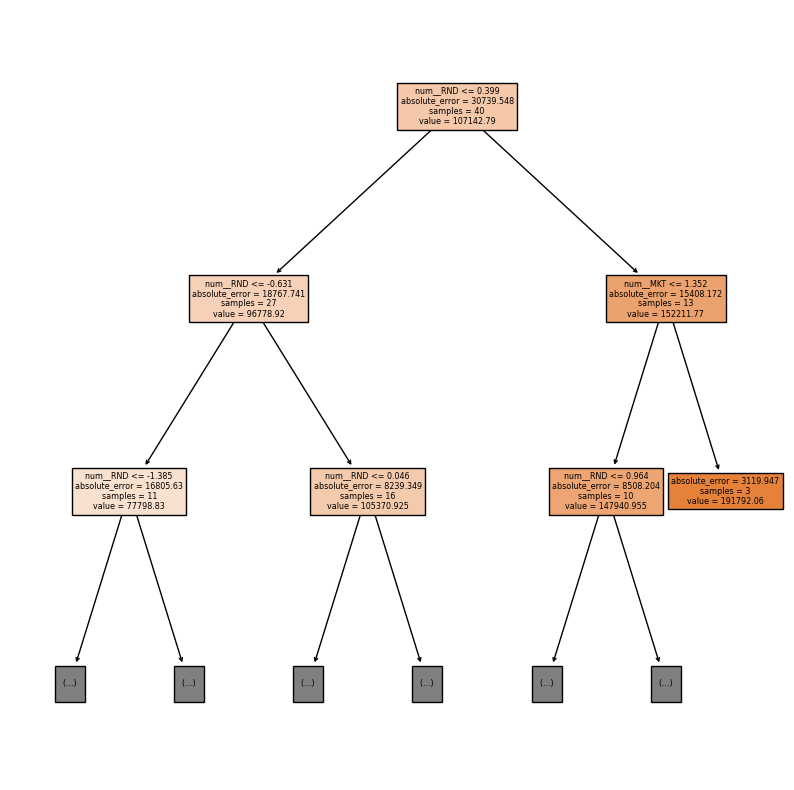

In [45]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtr,feature_names=xtrain.columns,filled=True,max_depth=2)
plt.show()

plot feature importance

In [46]:
imp=best_dtr.feature_importances_

In [47]:
imp

array([0.87270778, 0.        , 0.11496285, 0.        , 0.        ,
       0.01232936])

In [48]:
xtrain.columns

Index(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'],
      dtype='object')

In [50]:
imp=pd.Series(imp)

In [51]:
imp

0    0.872708
1    0.000000
2    0.114963
3    0.000000
4    0.000000
5    0.012329
dtype: float64

In [52]:
imp.index=xtrain.columns

In [53]:
imp

num__RND                 0.872708
num__ADMIN               0.000000
num__MKT                 0.114963
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
cat__STATE_New York      0.012329
dtype: float64

In [54]:
imp=imp.sort_values(ascending=False)
imp

num__RND                 0.872708
num__MKT                 0.114963
cat__STATE_New York      0.012329
num__ADMIN               0.000000
cat__STATE_California    0.000000
cat__STATE_Florida       0.000000
dtype: float64

<Axes: title={'center': 'feature importance'}>

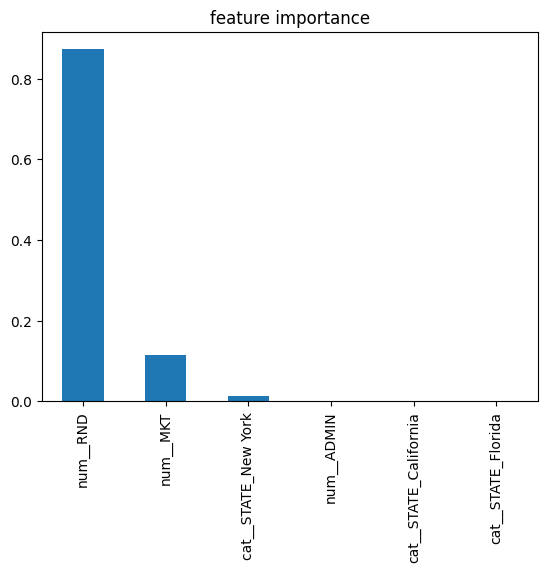

In [55]:
imp.plot(kind='bar',title='feature importance')


In [59]:
xnew=pd.read_csv('test.csv')

In [60]:
xnew_pre=pre.transform(xnew)

In [61]:
xnew

,RND,ADMIN,MKT,STATE
0,78013.11,121597.55,264346.06,California
1,22177.74,154806.14,28334.72,California
2,23640.93,96189.63,148001.11,California
3,101913.08,110594.11,229160.95,Florida
4,77044.01,99281.34,140574.81,New York
5,542.05,51743.15,0.00,New York
6,61136.38,152701.92,88218.23,New York
7,100671.96,91790.61,249744.55,California
8,28663.76,127056.21,201126.82,Florida
9,20229.59,65947.93,185265.10,New York


In [62]:
xnew_pre=pd.DataFrame(xnew_pre,columns=cols)
xnew_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,0.094441,0.009118,0.440446,1.0,0.0,0.0
1,-1.134305,1.206419,-1.509074,1.0,0.0,0.0
2,-1.102106,-0.906938,-0.520596,1.0,0.0,0.0
3,0.620398,-0.387599,0.149807,0.0,1.0,0.0
4,0.073115,-0.795469,-0.581939,0.0,0.0,1.0
5,-1.610433,-2.509409,-1.743127,0.0,0.0,1.0
6,-0.276958,1.130554,-1.014419,0.0,0.0,1.0
7,0.593085,-1.065540,0.319834,1.0,0.0,0.0
8,-0.991570,0.205925,-0.081763,0.0,1.0,0.0
9,-1.177178,-1.997270,-0.212785,0.0,0.0,1.0


In [63]:
pred=best_dtr.predict(xnew_pre)

In [64]:
xnew['PROFIT_Pred']=pred
xnew

,RND,ADMIN,MKT,STATE,PROFIT_Pred
0,78013.11,121597.55,264346.06,California,124266.90
1,22177.74,154806.14,28334.72,California,78019.37
2,23640.93,96189.63,148001.11,California,78019.37
3,101913.08,110594.11,229160.95,Florida,141585.52
4,77044.01,99281.34,140574.81,New York,111313.02
5,542.05,51743.15,0.00,New York,42582.08
6,61136.38,152701.92,88218.23,New York,96778.92
7,100671.96,91790.61,249744.55,California,141585.52
8,28663.76,127056.21,201126.82,Florida,89949.14
9,20229.59,65947.93,185265.10,New York,89949.14


In [65]:
xnew.to_csv('resultdtr.csv',index=False)